In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Read taxi data

In [2]:
# Read Data
taxi_data = pd.read_csv('taxi_data.csv')

In [3]:
# Check which columns are there
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [4]:
# Keep the required columns
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance']]

In [5]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,238,239,1.0,1.2
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,239,238,1.0,1.2
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,238,238,1.0,0.6
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,238,151,1.0,0.8
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,193,193,1.0,0.0


## Check null and duplicate data

In [6]:
# check if there is any null value
taxi_data[taxi_data.isnull().values==True]

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance
18801,07/04/2020 09:22:00 PM,07/04/2020 09:37:00 PM,116,74,NaN,3.03
19120,07/04/2020 09:06:00 PM,07/04/2020 09:09:00 PM,48,48,NaN,1.00
19668,07/04/2020 09:54:00 PM,07/04/2020 10:07:00 PM,137,145,NaN,2.62
19759,07/04/2020 09:37:00 PM,07/04/2020 10:04:00 PM,231,36,NaN,6.61
19897,07/04/2020 09:11:00 PM,07/04/2020 09:23:00 PM,208,147,NaN,4.75
...,...,...,...,...,...,...
24648494,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,143,20,NaN,9.22
24648495,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,4,262,NaN,4.79
24648496,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,210,78,NaN,28.00
24648497,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,148,129,NaN,7.08


In [7]:
# drop null value
taxi_data.dropna(inplace=True)

In [8]:
# check if the null rows are already deleted
taxi_data[taxi_data.isnull().values==True]

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance


In [9]:
# check if there is any duplicate value
taxi_data[taxi_data.duplicated(keep=False)]

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance
161,01/01/2020 12:54:28 AM,01/01/2020 12:58:41 AM,170,137,1.0,0.60
162,01/01/2020 12:54:28 AM,01/01/2020 12:58:41 AM,170,137,1.0,0.60
374,01/01/2020 12:57:13 AM,01/01/2020 12:58:05 AM,260,260,1.0,0.11
375,01/01/2020 12:57:13 AM,01/01/2020 12:58:05 AM,260,260,1.0,0.11
671,01/01/2020 12:36:31 AM,01/01/2020 12:37:23 AM,141,141,3.0,0.18
...,...,...,...,...,...,...
24549122,12/31/2020 11:39:32 PM,12/31/2020 11:46:22 PM,148,107,1.0,1.54
24549171,12/31/2020 11:18:23 PM,12/31/2020 11:38:15 PM,230,87,1.0,5.81
24549172,12/31/2020 11:18:23 PM,12/31/2020 11:38:15 PM,230,87,1.0,5.81
24549176,12/31/2020 11:14:08 PM,12/31/2020 11:16:05 PM,236,237,1.0,0.49


In [10]:
# Remove duplicated rows
taxi_data.drop_duplicates(inplace=True)

In [11]:
# Verify the removal
taxi_data.duplicated().sum()

0

## Check for outliers

In [12]:
# View the unique values ​​and counts of PULocationID and DOLocationID
print(taxi_data['PULocationID'].value_counts())
print(taxi_data['DOLocationID'].value_counts())

PULocationID
237    1132083
236    1075664
161     937065
186     854435
162     823331
        ...   
105         13
176         10
199          8
30           7
245          6
Name: count, Length: 262, dtype: int64
DOLocationID
236    1112914
237    1004306
161     835468
170     726958
141     677881
        ...   
99         113
2           18
105         10
104          1
199          1
Name: count, Length: 263, dtype: int64


In [13]:
# View descriptive statistics
print(taxi_data.describe())

       PULocationID  DOLocationID  passenger_count  trip_distance
count  2.375567e+07  2.375567e+07     2.375567e+07   2.375567e+07
mean   1.646788e+02  1.620895e+02     1.468194e+00   2.750660e+00
std    6.621025e+01  7.061567e+01     1.113282e+00   4.414869e+01
min    1.000000e+00  1.000000e+00     0.000000e+00  -2.218000e+01
25%    1.250000e+02  1.070000e+02     1.000000e+00   9.700000e-01
50%    1.620000e+02  1.620000e+02     1.000000e+00   1.600000e+00
75%    2.340000e+02  2.340000e+02     1.000000e+00   2.880000e+00
max    2.650000e+02  2.650000e+02     9.000000e+00   1.673295e+05


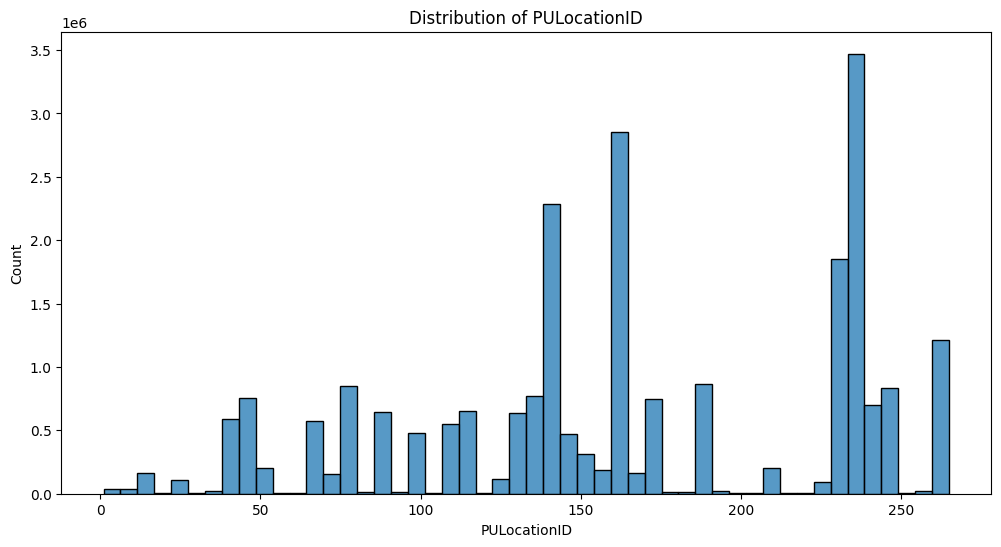

In [14]:
# Visualize the distribution of PULocationID
plt.figure(figsize=(12, 6))
sns.histplot(taxi_data['PULocationID'], bins=50)
plt.title('Distribution of PULocationID')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.show()

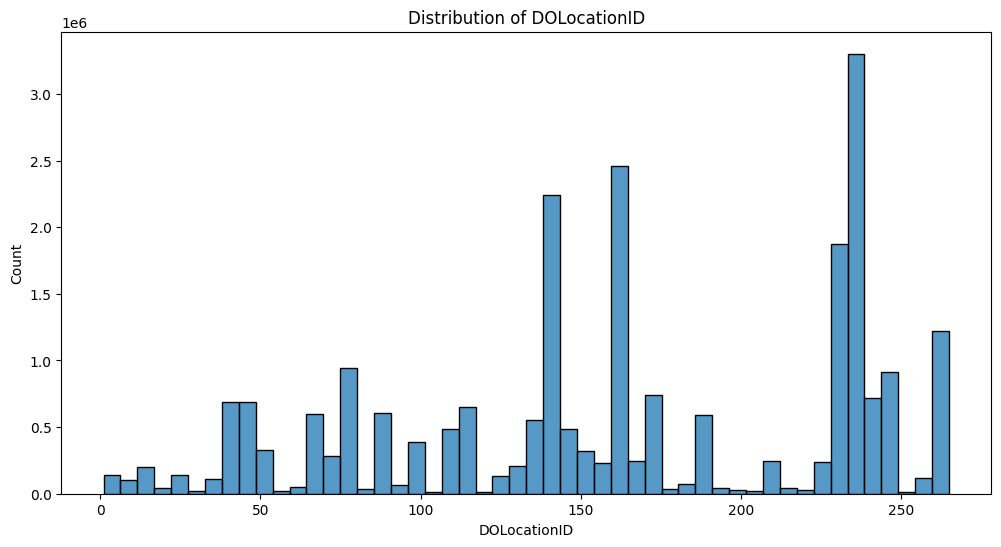

In [15]:
# Visualize the distribution of DOLocationIDD
plt.figure(figsize=(12, 6))
sns.histplot(taxi_data['DOLocationID'], bins=50)
plt.title('Distribution of DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.show()

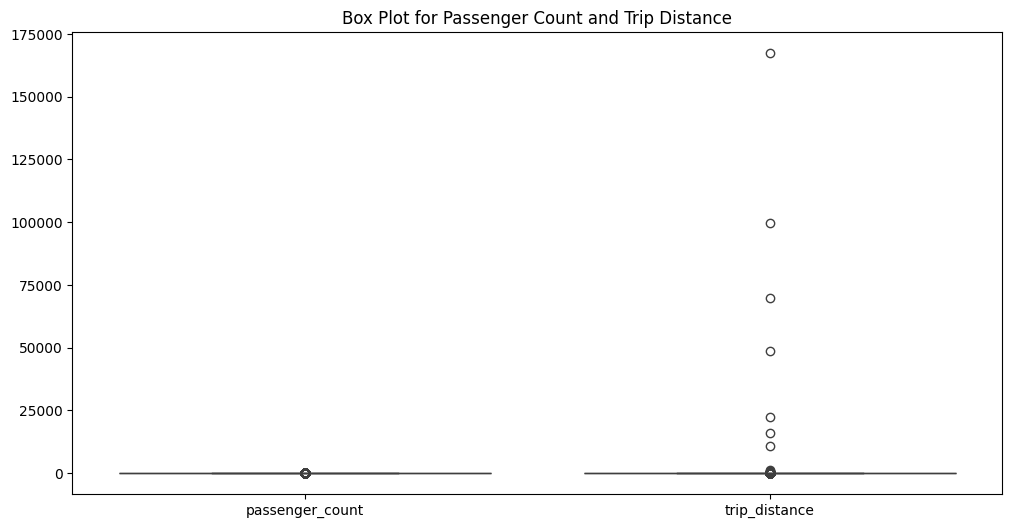

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=taxi_data[['passenger_count', 'trip_distance']])
plt.title('Box Plot for Passenger Count and Trip Distance')
plt.show()

In [17]:
z_scores = stats.zscore(taxi_data[['passenger_count', 'trip_distance']])
abs_z_scores = np.abs(z_scores)

outliers = np.where(abs_z_scores > 3)
print("Outliers: ", outliers)

Outliers:  (array([      42,      153,      196, ..., 23755483, 23755518, 23755655]), array([0, 0, 0, ..., 0, 0, 0]))


In [18]:
taxi_data = taxi_data[(abs_z_scores < 3).all(axis=1)]
print(taxi_data.describe())

       PULocationID  DOLocationID  passenger_count  trip_distance
count  2.253196e+07  2.253196e+07     2.253196e+07   2.253196e+07
mean   1.647107e+02  1.621046e+02     1.255356e+00   2.729264e+00
std    6.619738e+01  7.060803e+01     6.436540e-01   3.504351e+00
min    1.000000e+00  1.000000e+00     0.000000e+00  -2.218000e+01
25%    1.250000e+02  1.070000e+02     1.000000e+00   9.700000e-01
50%    1.620000e+02  1.620000e+02     1.000000e+00   1.600000e+00
75%    2.340000e+02  2.340000e+02     1.000000e+00   2.880000e+00
max    2.650000e+02  2.650000e+02     4.000000e+00   1.350000e+02


## Feature extraction

In [19]:
taxi_data.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
dtype: object

In [20]:
# Convert the time column to datetime type
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [21]:
taxi_data.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
dtype: object

In [22]:
# Extract pickup time features
taxi_data['pickup_hour'] = taxi_data['tpep_pickup_datetime'].dt.hour
taxi_data['pickup_minute'] = taxi_data['tpep_pickup_datetime'].dt.minute
taxi_data['pickup_weekday'] = taxi_data['tpep_pickup_datetime'].dt.day_name()
taxi_data['pickup_month'] = taxi_data['tpep_pickup_datetime'].dt.month

In [23]:
# Extract dropoff time features
taxi_data['dropoff_hour'] = taxi_data['tpep_dropoff_datetime'].dt.hour
taxi_data['dropoff_minute'] = taxi_data['tpep_dropoff_datetime'].dt.minute
taxi_data['dropoff_weekday'] = taxi_data['tpep_dropoff_datetime'].dt.day_name()
taxi_data['dropoff_month'] = taxi_data['tpep_dropoff_datetime'].dt.month

In [24]:
# Calculate the trip duration
# taxi_data['trip_duration'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60.0.round

In [25]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,pickup_hour,pickup_minute,pickup_weekday,pickup_month,dropoff_hour,dropoff_minute,dropoff_weekday,dropoff_month
0,2020-01-01 00:28:15,2020-01-01 00:33:03,238,239,1.0,1.2,0,28,Wednesday,1,0,33,Wednesday,1
1,2020-01-01 00:35:39,2020-01-01 00:43:04,239,238,1.0,1.2,0,35,Wednesday,1,0,43,Wednesday,1
2,2020-01-01 00:47:41,2020-01-01 00:53:52,238,238,1.0,0.6,0,47,Wednesday,1,0,53,Wednesday,1
3,2020-01-01 00:55:23,2020-01-01 01:00:14,238,151,1.0,0.8,0,55,Wednesday,1,1,0,Wednesday,1
4,2020-01-01 00:01:58,2020-01-01 00:04:16,193,193,1.0,0.0,0,1,Wednesday,1,0,4,Wednesday,1


## Construct busyness features

In [26]:
# Aggregate data by hour, minute, weekday and region, and calculate the total number of passengers in each time period and region as a busyness indicator
pickup_busy_data = taxi_data.groupby(['pickup_hour', 'pickup_minute', 'pickup_weekday', 'pickup_month', 'PULocationID']).agg({
    'passenger_count': 'sum',
    # 'trip_distance': 'mean',
    # 'trip_duration': 'mean'
}).reset_index()

In [27]:
# Aggregate data by dropoff times and locations
dropoff_busy_data = taxi_data.groupby(['dropoff_hour', 'dropoff_minute', 'dropoff_weekday', 'dropoff_month', 'DOLocationID']).agg({
    'passenger_count': 'sum'
}).reset_index()

In [28]:
# Rename columns to maintain consistency
pickup_busy_data.rename(columns={
    'pickup_hour': 'hour', 
    'pickup_minute': 'minute', 
    'pickup_weekday': 'weekday', 
    'pickup_month': 'month', 
    'PULocationID': 'LocationID', 
    'passenger_count': 'busy_score'
}, inplace=True)

dropoff_busy_data.rename(columns={
    'dropoff_hour': 'hour', 
    'dropoff_minute': 'minute', 
    'dropoff_weekday': 'weekday', 
    'dropoff_month': 'month', 
    'DOLocationID': 'LocationID', 
    'passenger_count': 'busy_score'
}, inplace=True)

In [29]:
# Combine both datasets and aggregate by hour, minute, weekday, month, and LocationID
combined_busy_data = pd.concat([pickup_busy_data, dropoff_busy_data])
combined_busy_data = combined_busy_data.groupby(['hour', 'minute', 'weekday', 'month', 'LocationID']).agg({
    'busy_score': 'sum'
}).reset_index()

In [30]:
combined_busy_data.head()

,hour,minute,weekday,month,LocationID,busy_score
0,0,0,Friday,1,1,6.0
1,0,0,Friday,1,4,9.0
2,0,0,Friday,1,7,16.0
3,0,0,Friday,1,10,4.0
4,0,0,Friday,1,13,5.0


## plot

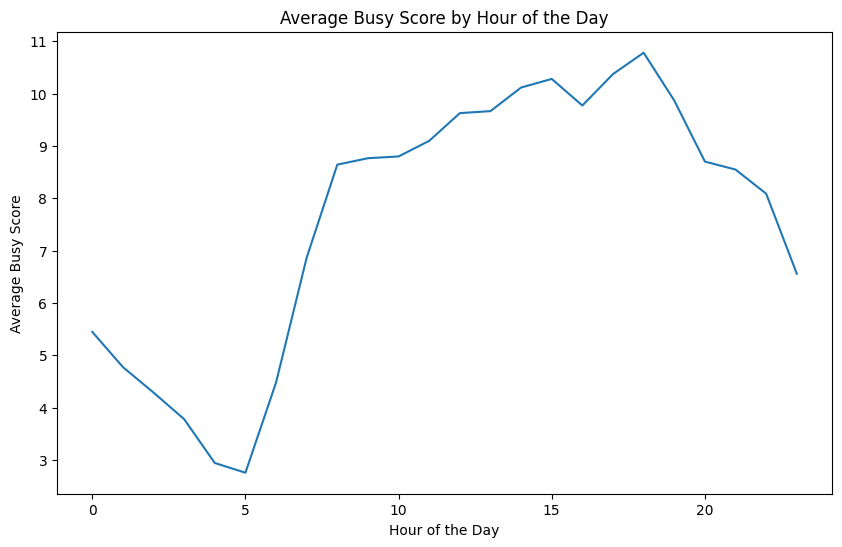

In [31]:
# Aggregate data by hour
hourly_data = combined_busy_data.groupby('hour')['busy_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data, x='hour', y='busy_score')
plt.title('Average Busy Score by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Busy Score')
plt.show()


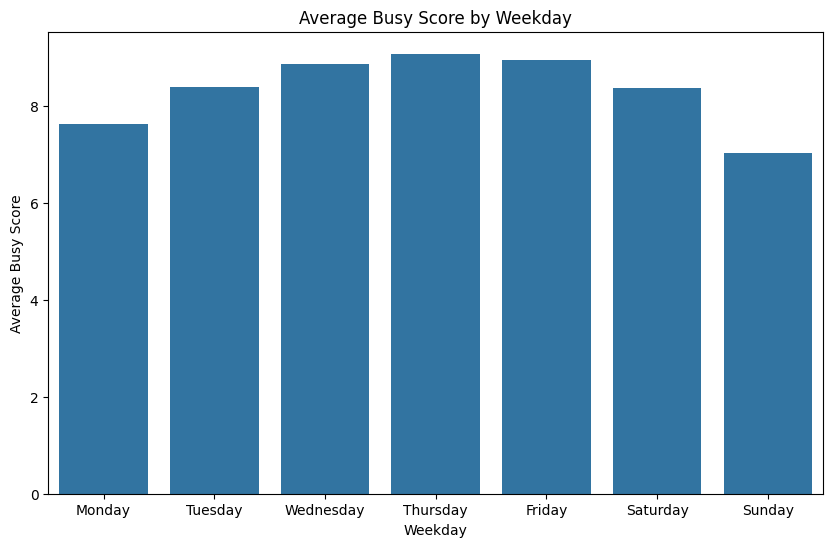

In [32]:
# Aggregate data by day of the week
weekday_data = combined_busy_data.groupby('weekday')['busy_score'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_data, x='weekday', y='busy_score')
plt.title('Average Busy Score by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Busy Score')
plt.show()

## Save as csv

In [33]:
combined_busy_data.to_csv('combined_busy_data.csv',index=None)

## Model Training

In [34]:
# Feature selection
X = combined_busy_data[['hour', 'minute', 'weekday', 'month', 'LocationID']]
y = combined_busy_data['busy_score']

In [35]:
combined_busy_data.dtypes

hour            int32
minute          int32
weekday        object
month           int32
LocationID      int64
busy_score    float64
dtype: object

In [36]:
# Convert to categorical features
X = pd.get_dummies(X, columns=['weekday'])

In [37]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model test

In [39]:
y_pred = model.predict(X_test)

In [40]:
# Output actual busyness and predicted value
results = pd.DataFrame({'Actual Busy Score': y_test, 'Predicted Busy Score': y_pred})
print(results.head())

         Actual Busy Score  Predicted Busy Score
6441693                1.0                  1.84
6324224                3.0                  2.57
6682142                4.0                  2.62
2883037                3.0                  2.22
4615394               10.0                 11.56


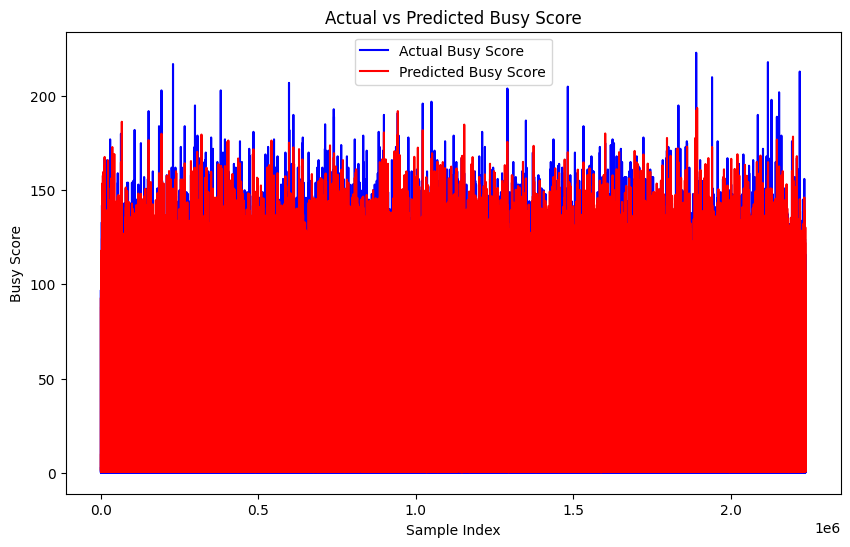

In [41]:
# Draw a comparison chart of actual values ​​and predicted values
plt.figure(figsize=(10, 6))
plt.plot(results['Actual Busy Score'].values, label='Actual Busy Score', color='b')
plt.plot(results['Predicted Busy Score'].values, label='Predicted Busy Score', color='r')
plt.title('Actual vs Predicted Busy Score')
plt.xlabel('Sample Index')
plt.ylabel('Busy Score')
plt.legend()
plt.show()

## Model Evaluation

In [42]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 2.408992343746648
Mean Squared Error (MSE): 16.44296848860946
Root Mean Squared Error (RMSE): 4.0549930318817395
R^2 Score: 0.9197029029712157


## export and generate pickcle file

In [43]:
import pickle

# Save the model
with open('model.pkl', 'wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)